In [15]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [16]:
data = pd.read_csv(r"C:\Users\Shivang\Downloads\archive (1)\engine_data.csv")
data.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [17]:
data.shape

(19535, 7)

In [18]:
X = data.drop(columns=["Engine Condition"])
y = data["Engine Condition"]

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms = mms.fit(X)
X_transformed = mms.transform(X)

In [21]:
X_transformed.shape

(19535, 6)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, stratify=y, random_state=58)

In [33]:
model=keras.Sequential([        
    keras.layers.Dense(2,input_shape=(6,),activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=25, batch_size=128)

Epoch 1/25
115/115 [==============================] - 1s 2ms/step - loss: 0.6764 - accuracy: 0.6305
Epoch 2/25
115/115 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6305
Epoch 3/25
115/115 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.6305
Epoch 4/25
115/115 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6304
Epoch 5/25
115/115 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.6303
Epoch 6/25
115/115 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6308
Epoch 7/25
115/115 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6313
Epoch 8/25
115/115 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.6327
Epoch 9/25
115/115 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.6335
Epoch 10/25
115/115 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.6352

In [34]:
y_pred = model.predict(X_test)

153/153 [==============================] - 0s 1ms/step


In [42]:
y_predicted = []
for lis in y_pred:
    if lis[0] > lis[1]:
        y_predicted.append(0)
    else:
        y_predicted.append(1)
y_predicted[:5]

[1, 1, 1, 1, 1]

In [43]:
y_test[:5]

11433    1
10152    1
1202     0
4689     1
13735    1
Name: Engine Condition, dtype: int64

In [44]:
model.evaluate(X_test, y_test)

153/153 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.6579


[0.6211681365966797, 0.6578624248504639]

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

Text(50.722222222222214, 0.5, 'Truth')

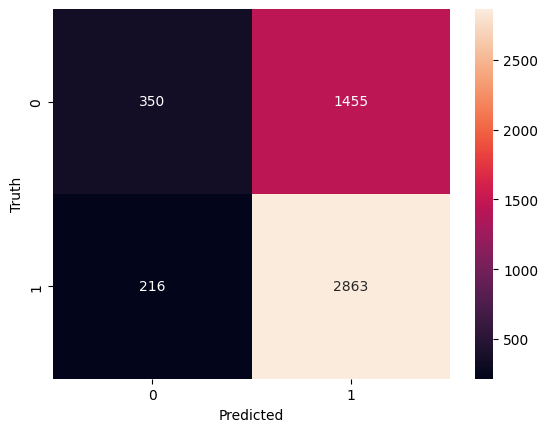

In [45]:
cm = confusion_matrix(y_test, y_predicted)

import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
pre = precision_score(y_test, y_predicted)
rec = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

print("Precision: ", pre)
print("Recall: ", rec)
print("F1 Score: ", f1)

Precision:  0.6630384437239463
Recall:  0.9298473530367002
F1 Score:  0.7740976071380289
